# Import Libraries


In [23]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Load and Explore the Dataset


In [24]:
# Load the dataset
data = pd.read_csv('stock_data.csv')

# Display the first few rows of the dataset
print("Dataset Preview:")
print(data.head())

Dataset Preview:
   Year  Open  Close  Volume  Moving_Avg Price_Movement
0  2000   100    102   50000         101             Up
1  2000   101     98   60000          99           Down
2  2001    99    100   55000          98             Up
3  2001    98    101   52000         100             Up
4  2002   102    104   48000         103             Up


# Prepare Data and Split into Training and Testing Sets


In [25]:
# Define features (X) and target (y)
X = data.drop('Price_Movement', axis=1)  # Features
y = data['Price_Movement']  # Target variable (up, down, stable)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

# Train the Decision Tree Model


In [26]:
# Create and train a Decision Tree classifier
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

DecisionTreeClassifier()

# Make Predictions and Evaluate Model Performance


In [27]:
# Make predictions on the testing data
y_pred = clf.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
print("\nModel Evaluation:")
print(f"Accuracy: {accuracy:.2f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Model Evaluation:
Accuracy: 1.00

Classification Report:
              precision    recall  f1-score   support

        Down       1.00      1.00      1.00         7
          Up       1.00      1.00      1.00         3

    accuracy                           1.00        10
   macro avg       1.00      1.00      1.00        10
weighted avg       1.00      1.00      1.00        10


Confusion Matrix:
[[7 0]
 [0 3]]


# Visualize the Decision Tree


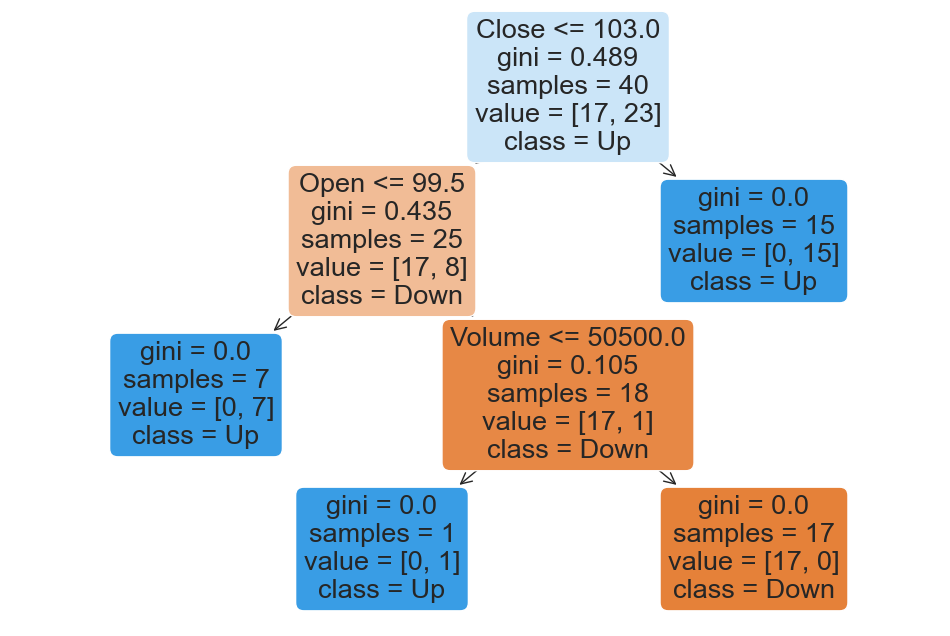

In [28]:
# Visualize the Decision Tree
from sklearn.tree import plot_tree
plt.figure(figsize=(12, 8))
plot_tree(clf, feature_names=X.columns,
          class_names=clf.classes_, filled=True, rounded=True)
plt.show()